# Diabetes Prediction Project

## Libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [95]:
df = pd.read_csv('Diabetes.csv')

In [96]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


## Exploratory Data Analysis

In [97]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


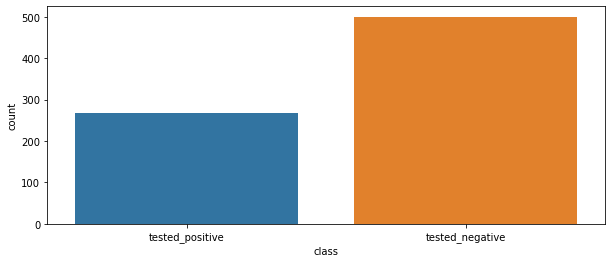

In [98]:
plt.figure(figsize=(10,4))
sns.countplot(x='class',data = df)

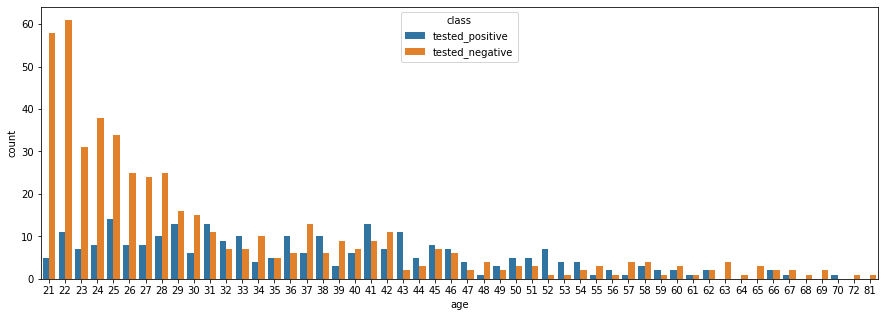

In [99]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'age' , hue = 'class' , data = df)

In [100]:
dff = df.drop('class' , axis = 1)

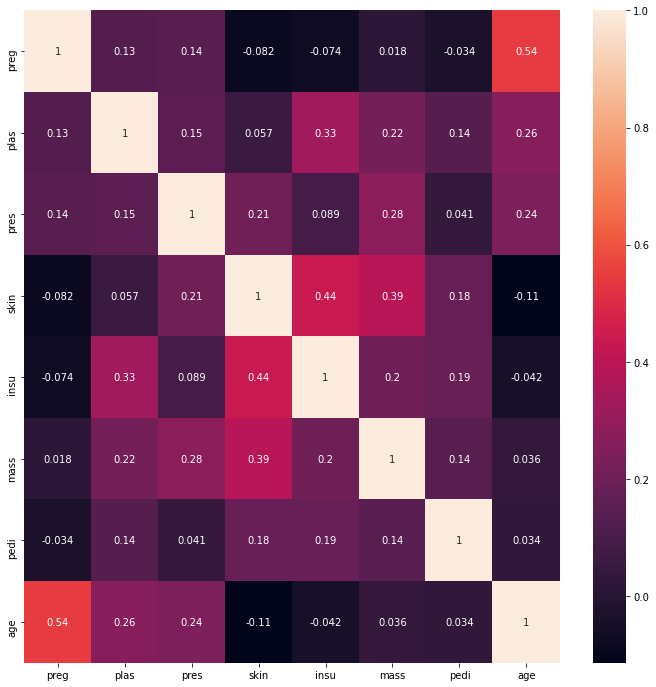

In [101]:
correlations = dff.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correlations , annot = True)

## Preparing the Data

In [102]:
y = df['class']

In [103]:
y

0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
763    tested_negative
764    tested_negative
765    tested_negative
766    tested_positive
767    tested_negative
Name: class, Length: 768, dtype: object

In [104]:
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(pd.DataFrame(df['class'])).toarray() # Convertir a categórico
y = pd.DataFrame(y)
y.drop(0 , axis = 1 , inplace = True)
y.rename(columns = {1:'class'} , inplace = True)

In [111]:
y = y['class']

In [112]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: class, Length: 768, dtype: float64

In [113]:
X = dff.copy()

In [114]:
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### Scaling the Data

In [115]:
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)

### Splitting the Data

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y,test_size = 0.25)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [118]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [119]:
y_pred = model.predict(X_test)

In [120]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1.])

In [121]:
y_test

651    0.0
353    0.0
592    1.0
593    0.0
381    0.0
      ... 
192    1.0
30     0.0
105    0.0
511    0.0
661    1.0
Name: class, Length: 192, dtype: float64

Accuracy 79.16666666666666 %


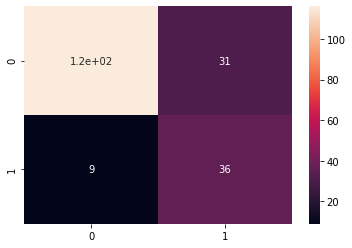

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)

In [125]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85       125
         1.0       0.80      0.54      0.64        67

    accuracy                           0.79       192
   macro avg       0.79      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



In [126]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train , y_train)

RandomForestClassifier()

Accuracy 75.52083333333334 %


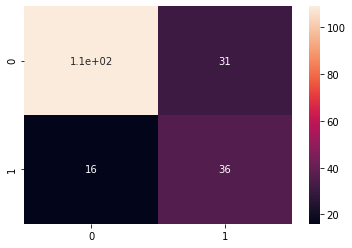

In [127]:
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)

In [128]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       125
         1.0       0.69      0.54      0.61        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

